In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
train_df = pd.read_csv("../data/house_price/train.csv", na_values="?")

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
train_df.shape

(1460, 81)

In [46]:
target_name = "SalePrice"
target = train_df[target_name]
data = train_df.drop(columns=[target_name, "Id"])

target = (target > 150000).astype(int)
target.shape

(1460,)

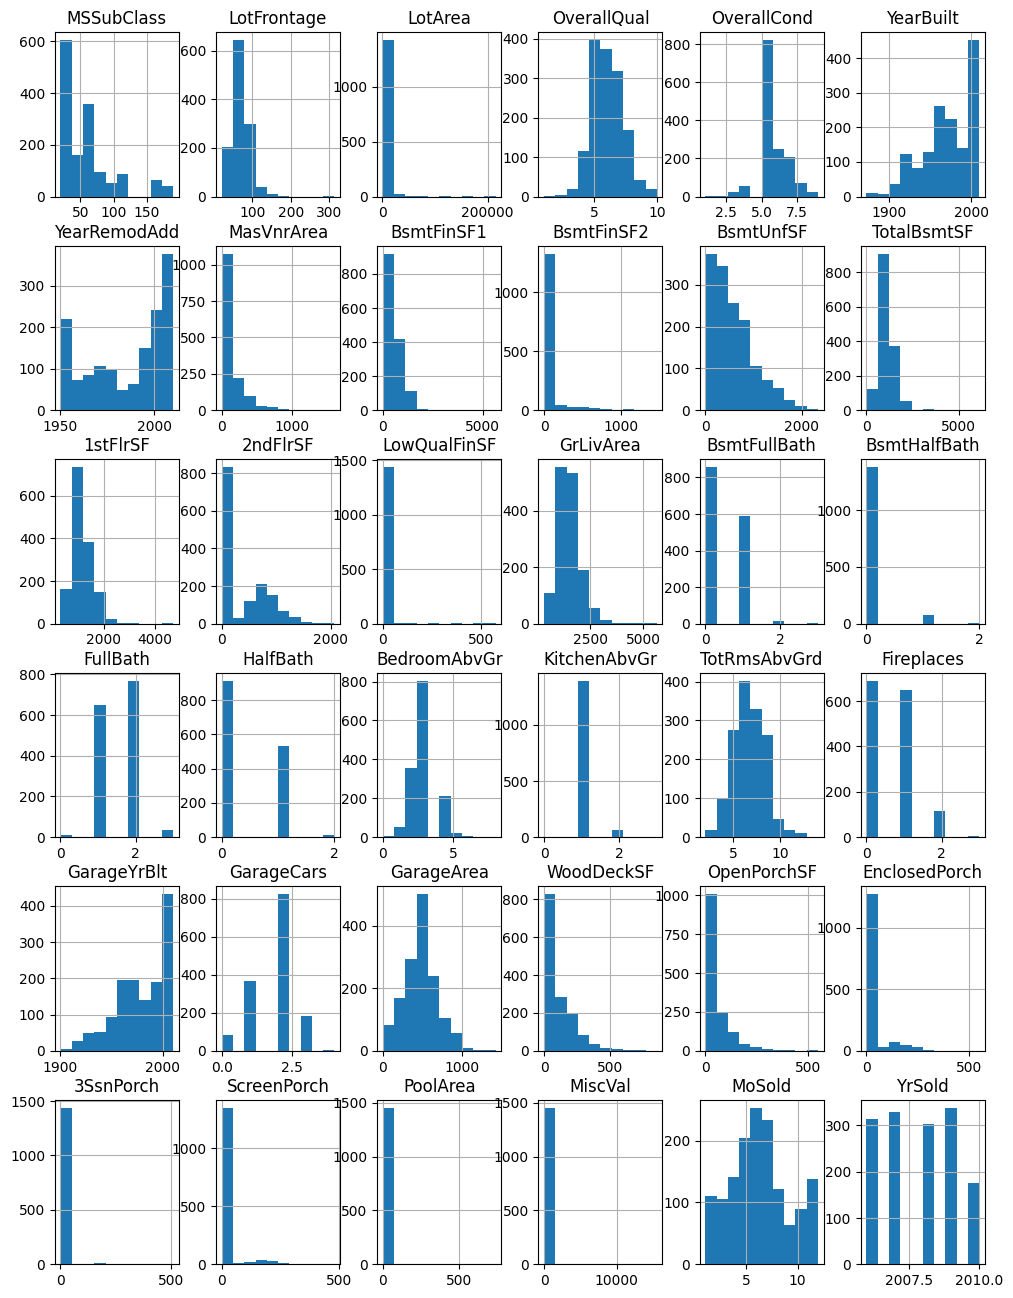

In [15]:
data.hist(figsize=(12, 16));

In [49]:
numeric_features = ["LotArea", "FullBath", "HalfBath"]
categorical_features = ["Neighborhood", "HouseStyle"]

data_feature = train_df[numeric_features + categorical_features]

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [25]:
cate_transformer = OneHotEncoder(handle_unknown="ignore")

transformer = ColumnTransformer([
    ("num_transformer", num_transformer, numeric_features), 
    ("cate_transformer", cate_transformer, categorical_features)
])

In [30]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ("transformer", transformer), 
    ("predictor", LogisticRegression())
])

In [31]:
from sklearn import set_config

set_config("diagram")

In [32]:
model

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'FullBath',
                                                   'HalfBath']),
                                                 ('cate_transformer',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood',
                                                   'HouseStyle'])])),
                ('predictor', LogisticRegression())])

In [50]:
from sklearn.model_selection import cross_validate

cv_model = cross_validate(model, data_feature, target, cv=5)
cv_model["test_score"].mean()

0.8678082191780823